In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd

In [38]:

file_path = '/content/drive/MyDrive/ENS_491_P2.xlsx'


xls = pd.ExcelFile(file_path)


print(xls.sheet_names)


df = pd.read_excel(file_path, sheet_name=xls.sheet_names[0])
print(df.head())


['Sheet1']
     X1  X2  X3     Y1
0  0.01  10   25   193
1  0.01  10   50   380
2  0.01  10  100  1120
3  0.01  30   25   223
4  0.01  30   50   410


In [39]:

print(df.info())


print(df.isnull().sum())


df = df.dropna()



print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      45 non-null     float64
 1   X2      45 non-null     int64  
 2   X3      45 non-null     int64  
 3   Y1      45 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.5 KB
None
X1     0
X2     0
X3     0
Y1     0
dtype: int64
              X1         X2         X3            Y1
count  45.000000  45.000000   45.000000    45.000000
mean    0.050000  30.000000   58.333333   600.711111
std     0.028604  16.514456   31.532811   410.605242
min     0.010000  10.000000   25.000000   183.000000
25%     0.030000  10.000000   25.000000   263.000000
50%     0.050000  30.000000   50.000000   410.000000
75%     0.070000  50.000000  100.000000  1120.000000
max     0.090000  50.000000  100.000000  1211.000000


In [40]:
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:, :-1]
y = df.iloc[:, -1]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


print(X_scaled[:5])


[[0.         0.         0.        ]
 [0.         0.         0.33333333]
 [0.         0.         1.        ]
 [0.         0.5        0.        ]
 [0.         0.5        0.33333333]]


In [41]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (38, 3)
Test set size: (7, 3)


Random Forest Training


In [42]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Random Forest model trained.")


Random Forest model trained.


In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
ame_rf = mean_absolute_error(y_test, y_test_pred)

rmse_rf = mean_squared_error(y_test, y_test_pred)**0.5

print(f"Random Forest - R² (Train): {r2_train:.2f}, R² (Test): {r2_test:.2f}")
print(f"AME: {ame_rf:.2f}, RMSE: {rmse_rf:.2f}")

Random Forest - R² (Train): 1.00, R² (Test): 1.00
AME: 15.08, RMSE: 20.12


LS Boost (Gradient Boosting) Training

In [44]:
from sklearn.ensemble import GradientBoostingRegressor


ls_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
ls_model.fit(X_train, y_train)

print("LSBoost model trained.")


LSBoost model trained.


In [49]:
_train_pred_ls = ls_model.predict(X_train)
y_test_pred_ls = ls_model.predict(X_test)

r2_train_ls = r2_score(y_train, y_train_pred_ls)
r2_test_ls = r2_score(y_test, y_test_pred_ls)
ame_ls = mean_absolute_error(y_test, y_test_pred_ls)

rmse_ls = mean_squared_error(y_test, y_test_pred_ls)**0.5

print(f"LSBoost - R² (Train): {r2_train_ls:.2f}, R² (Test): {r2_test_ls:.2f}")
print(f"AME: {ame_ls:.2f}, RMSE: {rmse_ls:.2f}")

LSBoost - R² (Train): 1.00, R² (Test): 1.00
AME: 12.70, RMSE: 17.49


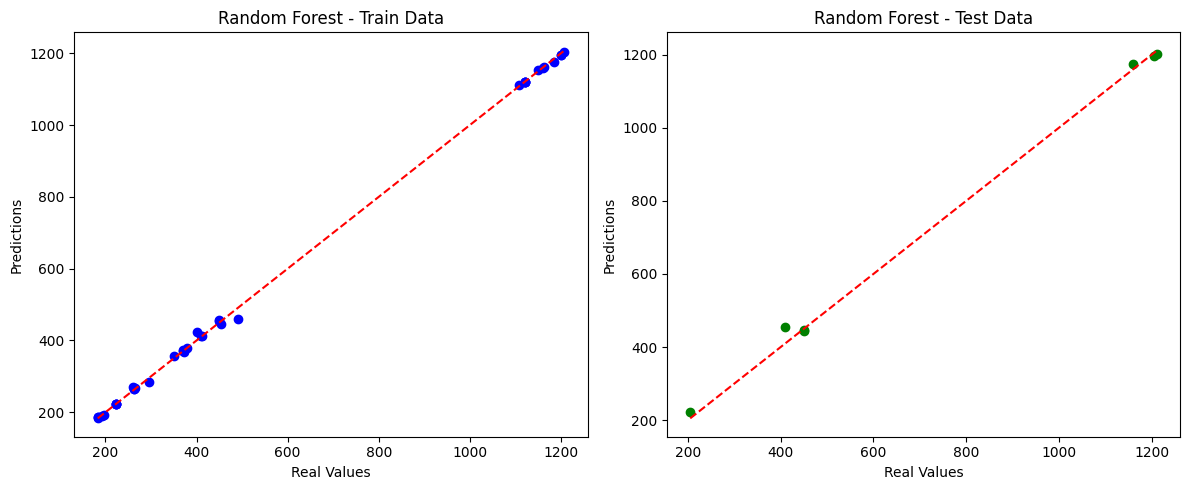

In [46]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, label='Train', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Random Forest - Train Data')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, label='Test', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Random Forest - Test Data')

plt.tight_layout()
plt.show()


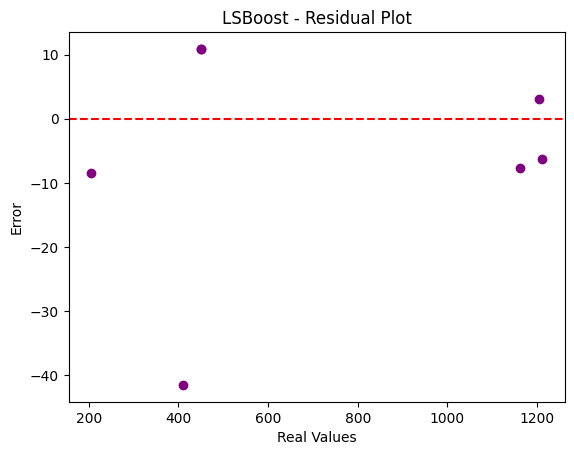

In [47]:

residuals_ls = y_test - y_test_pred_ls
plt.scatter(y_test, residuals_ls, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Real Values')
plt.ylabel('Error')
plt.title('LSBoost - Residual Plot')
plt.show()


In [48]:

data = {
    'Model': ['Random Forest', 'LSBoost'],
    'R² (Train)': [r2_train, r2_train_ls],
    'R² (Test)': [r2_test, r2_test_ls],
    'AME': [ame_rf, ame_ls],
    'RMSE': [rmse_rf, rmse_ls]
}

df_results = pd.DataFrame(data)
print(df_results)


           Model  R² (Train)  R² (Test)        AME       RMSE
0  Random Forest    0.999636   0.997592  15.078571  20.121620
1        LSBoost    0.999569   0.998180  12.703682  17.494185


#ML Exercise Part 2


In [51]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [52]:
X_scaled = scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=['X1', 'X2', 'X3'])

# adding columns to the dataframe
df['X1'] = X_df['X1']
df['X2'] = X_df['X2']
df['X3'] = X_df['X3']

# OLS model for ANOVA analysis
formula = 'Y1 ~ X1 + X2 + X3'
model = ols(formula, data=df).fit()

anova_results = anova_lm(model)
print("ANOVA results:")
print(anova_results)


ANOVA results:
            df        sum_sq       mean_sq            F        PR(>F)
X1         1.0  1.369000e+02  1.369000e+02     0.036261  8.499172e-01
X2         1.0  5.216670e+04  5.216670e+04    13.817517  6.028574e-04
X3         1.0  7.211158e+06  7.211158e+06  1910.036406  5.115929e-36
Residual  41.0  1.547915e+05  3.775403e+03          NaN           NaN


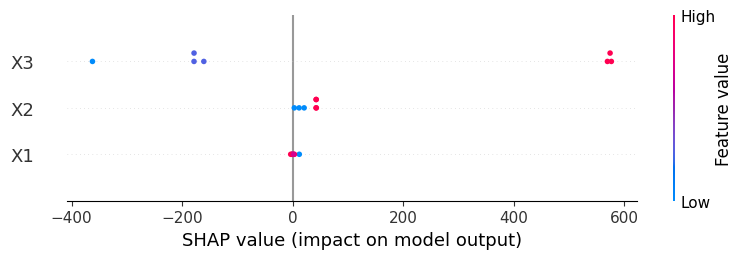

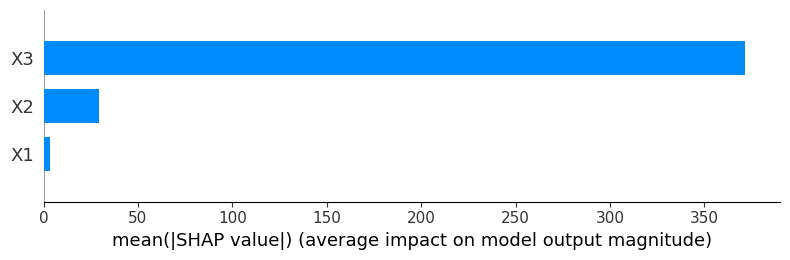

In [53]:
import shap

# calculating shapley values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# plotting the shapley values
shap.summary_plot(shap_values, X_test, feature_names=['X1', 'X2', 'X3'])

# bar plot
shap.summary_plot(shap_values, X_test, feature_names=['X1', 'X2', 'X3'], plot_type='bar')


In [54]:
import pandas as pd

anova_p_values_filtered = anova_results['PR(>F)'][:3]

shap_mean_importance = [abs(shap_values[:, i]).mean() for i in range(3)]

comparison_table = pd.DataFrame({
    'Feature': ['X1', 'X2', 'X3'],
    'ANOVA P-Value': anova_p_values_filtered.values,
    'Shapley Mean Importance': shap_mean_importance
})

print("Comparison of ANOVA and Shapley Results:")
print(comparison_table)


Comparison of ANOVA and Shapley Results:
  Feature  ANOVA P-Value  Shapley Mean Importance
0      X1   8.499172e-01                 3.209077
1      X2   6.028574e-04                29.489981
2      X3   5.115929e-36               371.504010


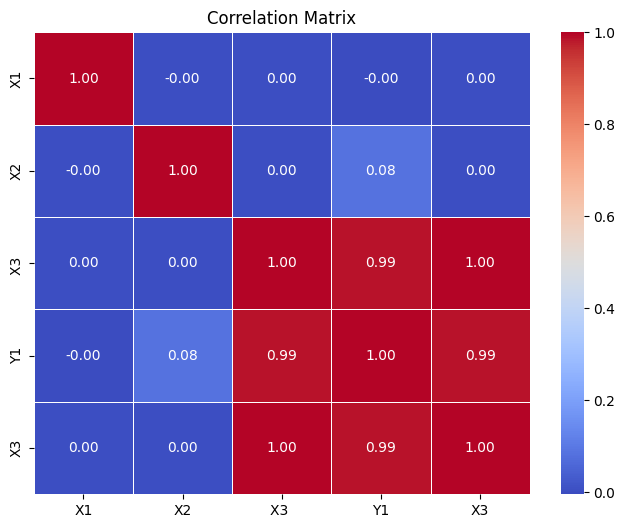

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Matrix implementation
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


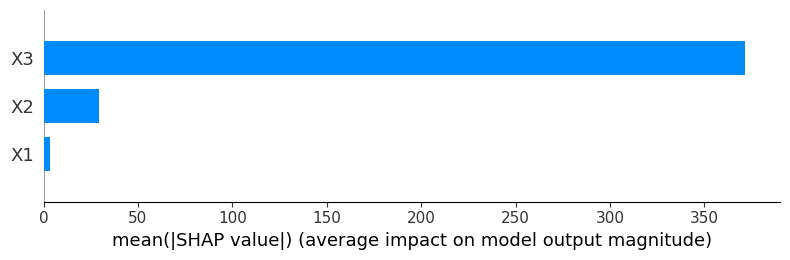

In [56]:
shap.summary_plot(shap_values, X_test, feature_names=['X1', 'X2', 'X3'], plot_type='bar')


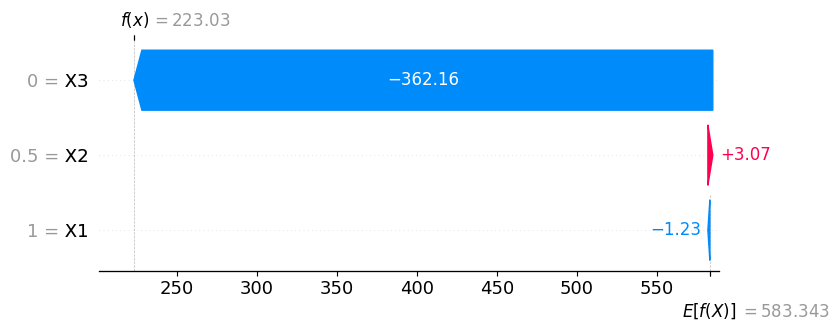

In [57]:
sample_index = 0
shap.waterfall_plot(shap.Explanation(values=shap_values[sample_index],
                                     base_values=explainer.expected_value,
                                     feature_names=['X1', 'X2', 'X3'],
                                     data=X_test[sample_index]))


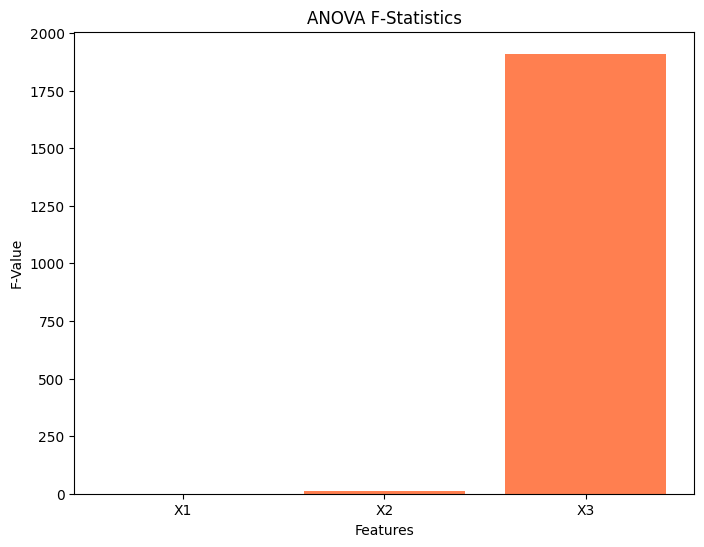

In [58]:
# plotting the ANOVA F-statistics
anova_f_stat = anova_results['F'][:3]
features = ['X1', 'X2', 'X3']

plt.figure(figsize=(8, 6))
plt.bar(features, anova_f_stat, color='coral')
plt.title("ANOVA F-Statistics")
plt.xlabel("Features")
plt.ylabel("F-Value")
plt.show()


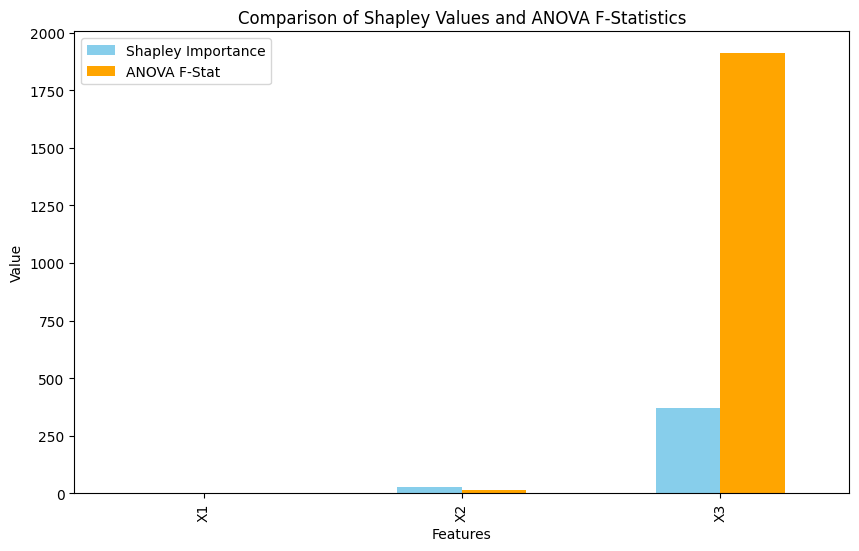

In [59]:
# Comparing Shapley Mean Importance and ANOVA F-statistics
shap_mean_importance = [abs(shap_values[:, i]).mean() for i in range(3)]
anova_f_stat = anova_results['F'][:3]

comparison_df = pd.DataFrame({
    'Feature': ['X1', 'X2', 'X3'],
    'Shapley Importance': shap_mean_importance,
    'ANOVA F-Stat': anova_f_stat
})

comparison_df.set_index('Feature').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Comparison of Shapley Values ​​and ANOVA F-Statistics")
plt.ylabel("Value")
plt.xlabel("Features")
plt.legend(["Shapley Importance", "ANOVA F-Stat"])
plt.show()


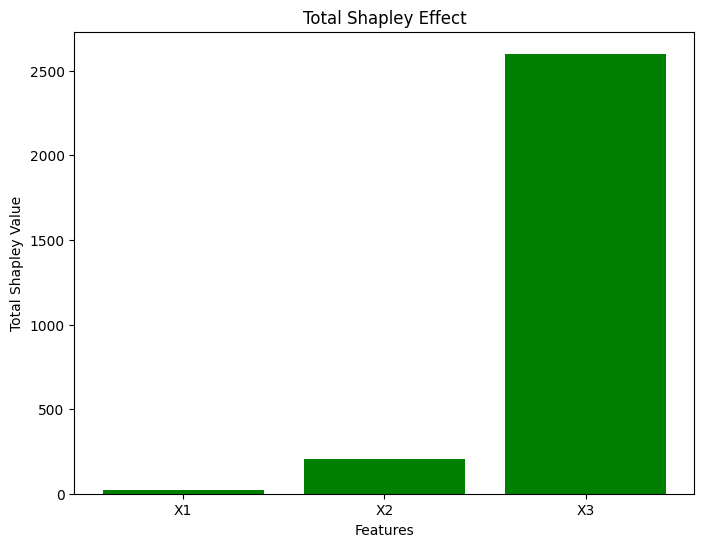

In [60]:
# Total shapley values for each variable
total_shap_values = abs(shap_values).sum(axis=0)

plt.figure(figsize=(8, 6))
plt.bar(['X1', 'X2', 'X3'], total_shap_values, color='green')
plt.title("Total Shapley Effect")
plt.xlabel("Features")
plt.ylabel("Total Shapley Value")
plt.show()


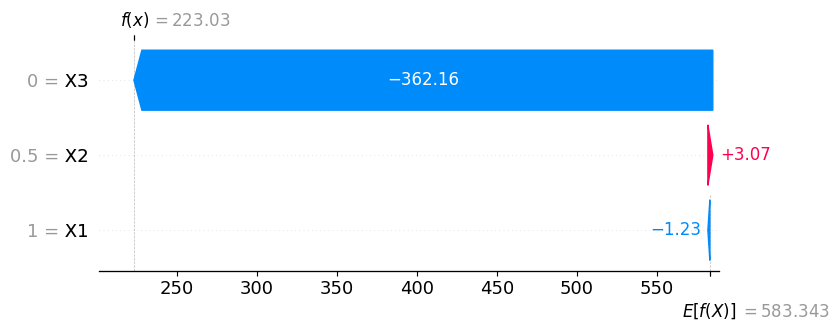

In [61]:
# Generating Shapley Waterfall Plot for a single test example
import numpy as np

# Select a specific test instance (e.g., the first instance)
sample_index = 0  # Change this index to visualize other samples

# Generating the waterfall plot
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[sample_index],
        base_values=explainer.expected_value,
        feature_names=['X1', 'X2', 'X3'],
        data=X_test[sample_index]
    )
)


Waterfall Plot for Test Instance 0


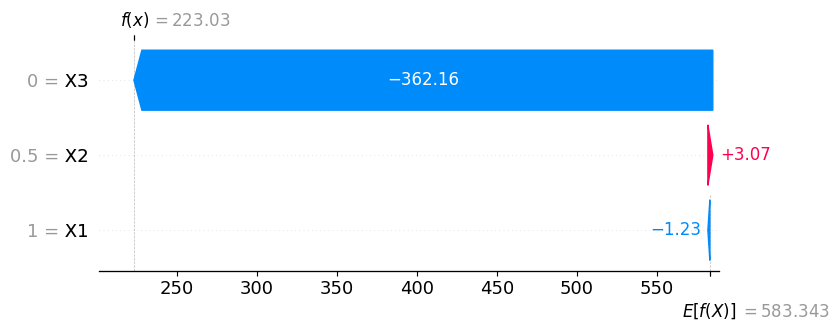

Waterfall Plot for Test Instance 1


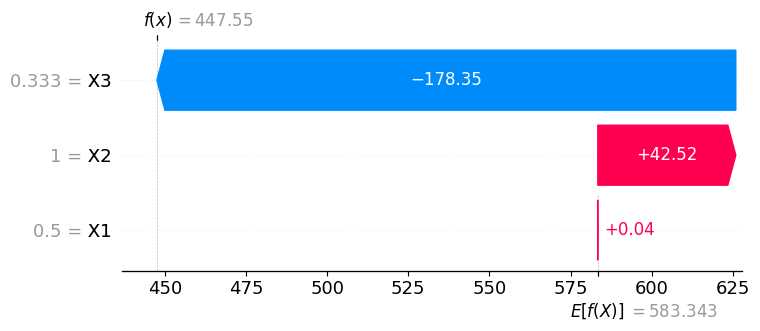

Waterfall Plot for Test Instance 2


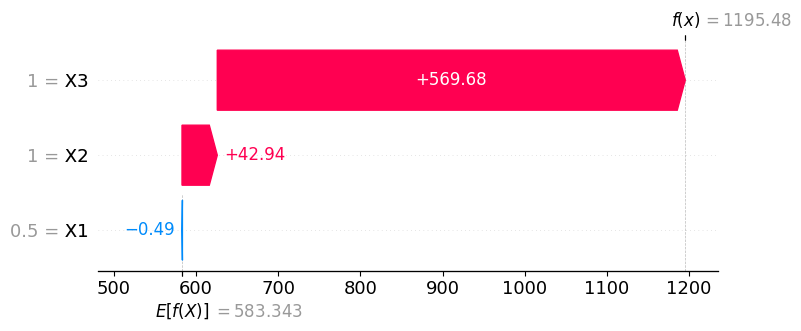

In [63]:
# Generating waterfall plots for the first 3 samples
for i in range(3):
    print(f"Waterfall Plot for Test Instance {i}")
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[i],
            base_values=explainer.expected_value,
            feature_names=['X1', 'X2', 'X3'],
            data=X_test[i]
        )
    )


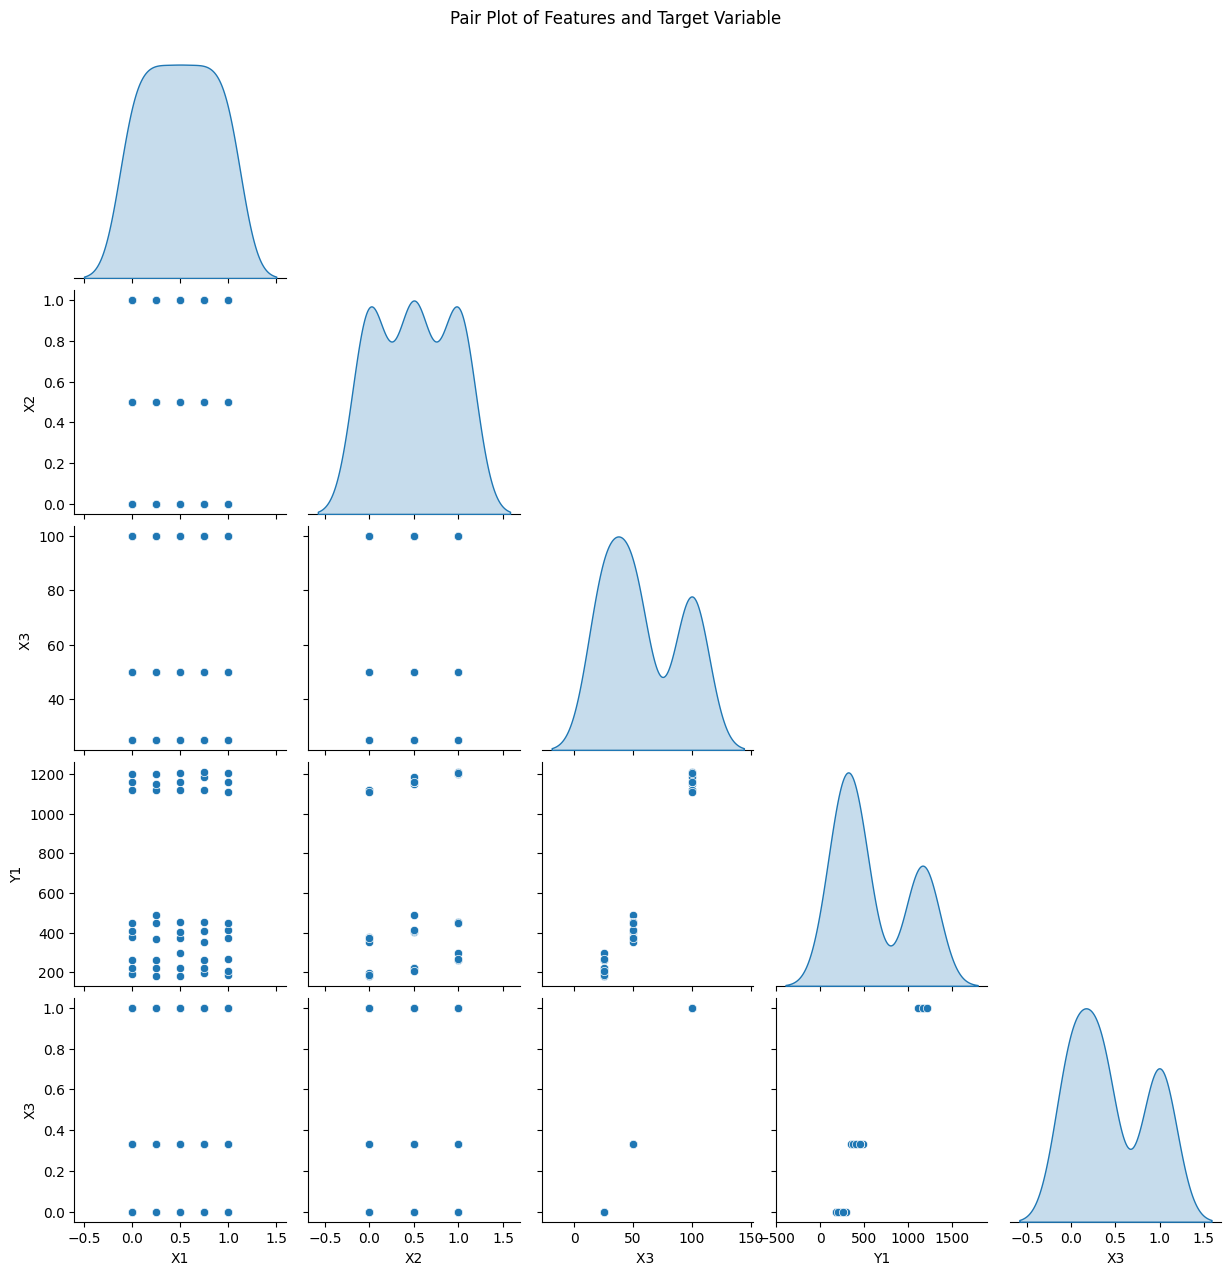

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair Plot
sns.pairplot(df, diag_kind="kde", corner=True)
plt.suptitle("Pair Plot of Features and Target Variable", y=1.02)
plt.show()


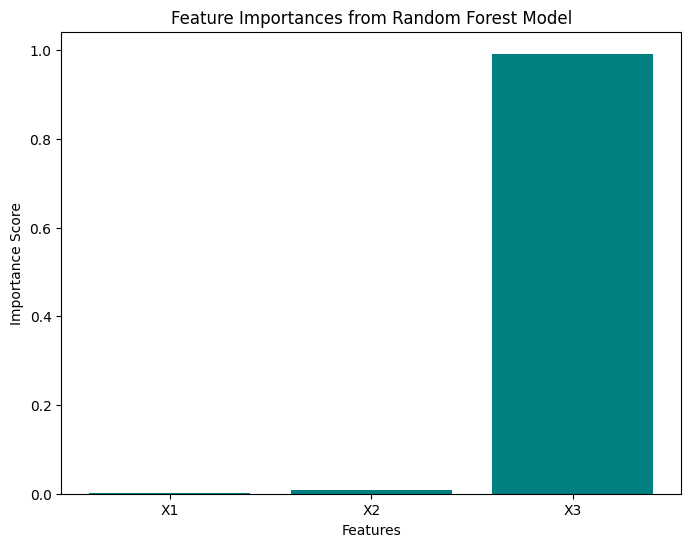

In [65]:
# Random Forest Feature Importances
import numpy as np

feature_importances = rf_model.feature_importances_
features = ['X1', 'X2', 'X3']

# Bar Chart for Feature Importances
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color='teal')
plt.title("Feature Importances from Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


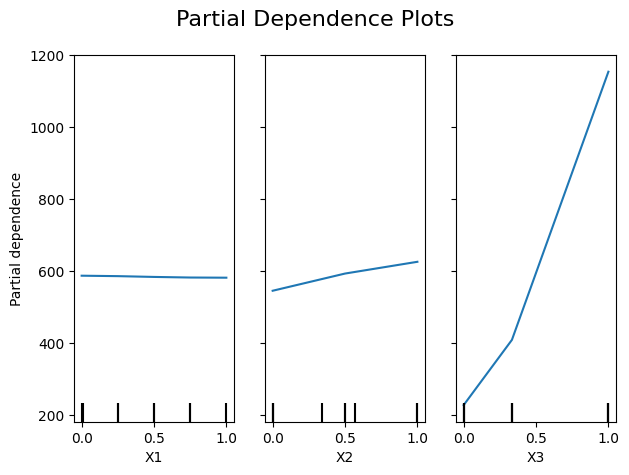

In [66]:
from sklearn.inspection import PartialDependenceDisplay

# Partial Dependence Plots for each feature
features = [0, 1, 2]  # Corresponding to X1, X2, X3 in the dataset
PartialDependenceDisplay.from_estimator(rf_model, X_train, features, feature_names=['X1', 'X2', 'X3'], grid_resolution=50)

plt.suptitle("Partial Dependence Plots", fontsize=16)
plt.tight_layout()
plt.show()


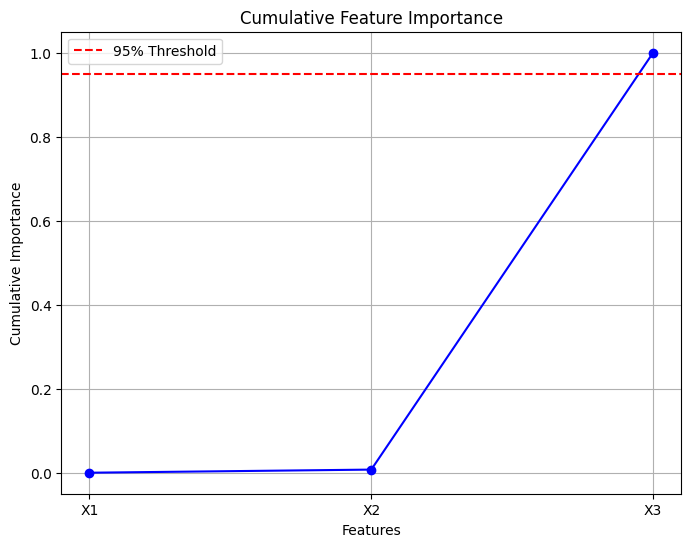

In [67]:
feature_importances = rf_model.feature_importances_

cumulative_importances = feature_importances.cumsum()

features = ['X1', 'X2', 'X3']

plt.figure(figsize=(8, 6))
plt.plot(features, cumulative_importances, marker='o', linestyle='-', color='b')
plt.title("Cumulative Feature Importance")
plt.xlabel("Features")
plt.ylabel("Cumulative Importance")
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Threshold")
plt.legend()
plt.show()


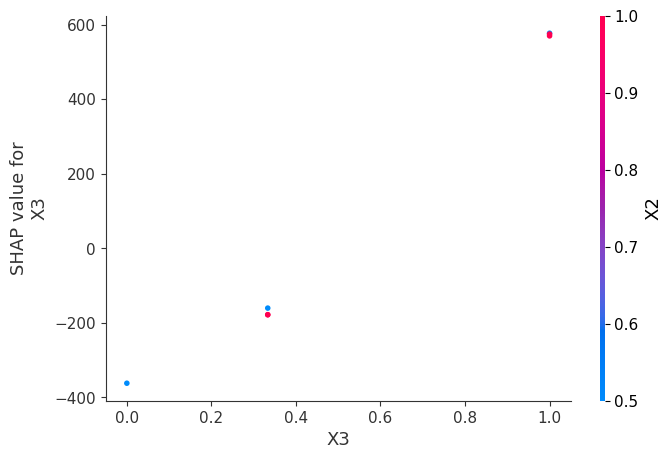

In [68]:
# SHAP dependence chart
# relationship between X2 and X3
shap.dependence_plot(
    ind=2,
    interaction_index=1,
    shap_values=shap_values,
    features=X_test,
    feature_names=['X1', 'X2', 'X3']
)
